In [2]:
import numpy as np
import pandas as pd
melbdf = pd.read_csv("melb_data.csv")
melbdf.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
melbdf.info()
melbdf.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [23]:
melbdf[melbdf.duplicated()] 
#Make sure there are no duplicated columns

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [25]:

coldf = melbdf.columns
for col in coldf:
    empty_values = 0
    is_empty = melbdf[col].isnull()
    for value in is_empty:
        if value == True :
            empty_values = empty_values +1

    print(col ," = ", empty_values)
#Find if and how many empty values there are per column

Suburb  =  0
Address  =  0
Rooms  =  0
Type  =  0
Price  =  0
Method  =  0
SellerG  =  0
Date  =  0
Distance  =  0
Postcode  =  0
Bedroom2  =  0
Bathroom  =  0
Car  =  62
Landsize  =  0
BuildingArea  =  6450
YearBuilt  =  5375
CouncilArea  =  1369
Lattitude  =  0
Longtitude  =  0
Regionname  =  0
Propertycount  =  0


In [19]:
from sklearn.model_selection import train_test_split
X = melbdf[['Rooms', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = melbdf['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#split_dataset
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
imp  = IterativeImputer(random_state = 0)
X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.fit_transform(X_test)
#impute missing values

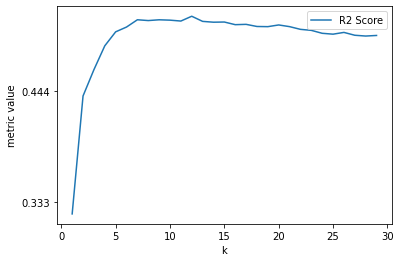

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
krange = range(1, 30)
r2 = []
mae = []
train_score = []
for k in krange:
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train_imp, y_train)
    y_pred = knnreg.predict(X_test_imp)
    mae.append(mean_absolute_error(y_pred, y_test))
    r2.append(knnreg.score(X_test_imp, y_test))
plt.figure
plt.xlabel('k')
plt.ylabel('metric value')
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.yticks(np.linspace(0, 1, 10))

plt.plot(krange, r2, label = 'R2 Score')

plt.legend()
plt.show()    
#fit and train model, visualize how the R2 score changes with regards to K. It is most accurate at k = 12 or k=13

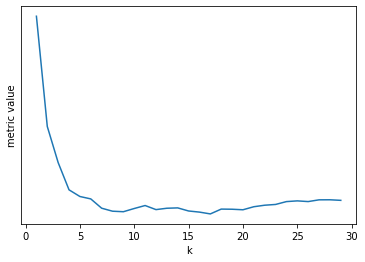

In [41]:
plt.figure
plt.xlabel('k')
plt.ylabel('metric value')
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.yticks(np.linspace(0, 1, 10))

plt.plot(krange, mae, label = 'Mean Absolute Error')
#This visualizes the mean absolute error with the model and the least mae is at k = 17

In [43]:
#The point of the above exercise is to attempt to determine what value of K gives the most accurate results.